In [ ]:
from google.colab import files
uploaded = files.upload()

Saving masukkan.xlsx to masukkan (3).xlsx


In [ ]:
import pandas as pd

df = pd.read_excel("masukkan.xlsx")
df

,id,pelayanan,fasilitas
0,1,58,8
1,2,54,6
2,3,98,10
3,4,52,3
4,5,11,1
...,...,...,...
95,96,30,4
96,97,25,4
97,98,27,2
98,99,8,1


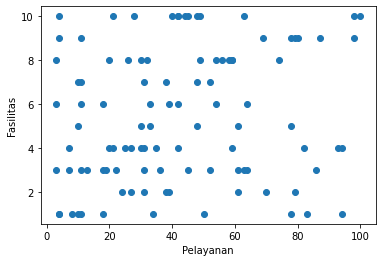

In [ ]:
import matplotlib.pyplot as plt

# melihat grafik persebaran data hotel
plt.scatter(df.pelayanan, df.fasilitas)
plt.xlabel("Pelayanan")
plt.ylabel("Fasilitas")
plt.show()

In [ ]:
def plot_linguistik(titik, warna, label='', min=0, max=1):
 
 
    # nilai y selalu 0, 1, 1, 0
    y = [0, 1, 1, 0]
 
    # plot garis pertama
    plt.plot([min, titik[0]], [0, 0], warna)
    
    # plot garis antara
    for i in range(len(titik) - 1):
        plt.plot([titik[i], titik[i + 1]], [y[i], y[i + 1]], warna)
    
    # plot garis terakhir
    plt.plot([titik[3], max], [0, 0], warna, label=label)

In [ ]:
def plot_membership(membership, min=0, max=1):
 
    # inisiasi warna yang akan digunakan
    warna = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
 
    # plot tiap linguistik
    i = 0
    for ling in membership:
        plot_linguistik(membership[ling], warna[i], ling, min=min, max=max)
        i += 1
    
    plt.legend(loc=3)
    plt.show()

In [ ]:
def fuzzy_linguistik(x, titik):

    if x < titik[0] or x > titik[3]:
        return 0
    elif x >= titik[1] and x <= titik[2]:
        return 1
    elif x >= titik[0] and x < titik[1]:
        return (x - titik[0]) / (titik[1] - titik[0])
    elif x >= titik[2] and x < titik[3]:
        return (titik[3] - x) / (titik[3] - titik[2])
    return 0

In [ ]:
def fuzzy_membership(x, membership):

    hasil = {}
    for ling in membership:
        hasil[ling] = fuzzy_linguistik(x, membership[ling])

    return hasil

In [ ]:
def fuzzyfikasi(x, list_membership):
    hasil = []
    for i in range(len(list_membership)):
        hasil.append(fuzzy_membership(x[i], list_membership[i]))

    return hasil

In [ ]:
def inferensi(x_fuzzy, rule):
    hasil = {}
    for l1, v1 in x_fuzzy[0].items():
        for l2, v2 in x_fuzzy[1].items():
            r, min_value = (l1, l2), min(v1, v2)
            current_value = hasil.get(rule[r], 0)
            hasil[rule[r]] = max(min_value, current_value)

    return hasil

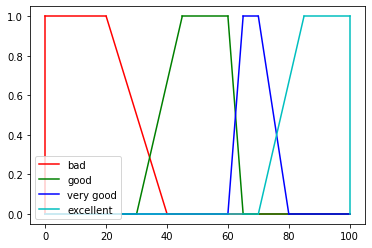

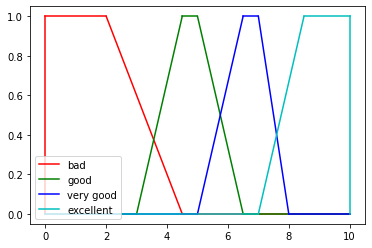

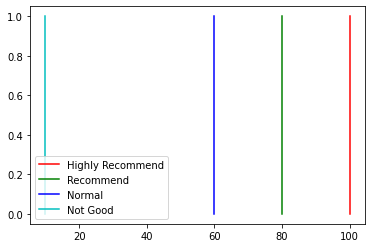

In [ ]:
# membership pelayanan
pelayanan = {
    'bad'        : [ 0,  0,  20,  40],
    'good'       : [ 30, 45, 60, 65],
    'very good'  : [ 60, 65, 70,  80],
    'excellent'  : [ 70,  85,  100,  100]
}
# membership fasilitas  
fasilitas = {
    'bad'      : [0,  0,  2,  4.5],
    'good'       : [3,  4.5,  5,  6.5],
    'very good'  : [5, 6.5, 7, 8],
    'excellent'  : [7,  8.5,  10,  10]
}
# plot seluruh membership
plot_membership(pelayanan, max=100)
plot_membership(fasilitas, max=10)

# rule inferensi
rule = {
    ('bad',  'bad')             : 'Not Good',
    ('bad',  'good')            : 'Not Good',
    ('bad', 'very good')        : 'Not Good',
    ('bad',  'excellent')       : 'Normal',
    ('good',  'bad')            : 'Not Good',
    ('good',  'good')           : 'Normal',
    ('good', 'very good')       : 'Recommend',
    ('good',  'excellent')      : 'Recommend',
    ('very good', 'bad')        : 'Not Good',
    ('very good', 'good')       : 'Recommend',
    ('very good', 'very good')  : 'Recommend',
    ('very good', 'excellent')  : 'Highly Recommend',
    ('excellent', 'bad')        : 'Normal',
    ('excellent', 'good')       : 'Recommend',
    ('excellent', 'very good')  : 'Recommend',
    ('excellent', 'excellent')  : 'Highly Recommend',
}
# membership sugeno
accept_sugeno = {'Highly Recommend':100, 'Recommend' :80, 'Normal' :60 , 'Not Good' :10}

# plot membership sugeno
colors = 'rgbc'
for key, val in accept_sugeno.items():
    plt.plot([val, val], [0, 1], colors[0], label=key )
    colors = colors[1:]
plt.legend(loc=3)

plt.show()

In [ ]:
def defuzz_sugeno(x_infer, membership):

    Atas, Bawah = 0, 0

   
    for ling in membership:
        Atas += x_infer[ling] * membership[ling]
        Bawah += x_infer[ling]
        
    if Bawah != 0 :
        return Atas / Bawah
    else :
        return 0

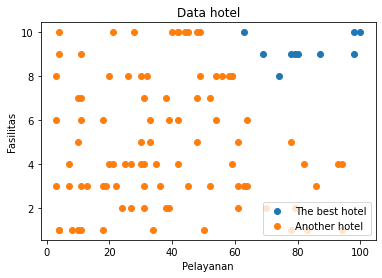

In [ ]:
skor = []
for x in df.drop('id', axis=1).values:
    x_fuzzy = fuzzyfikasi(x, [pelayanan, fasilitas])
    x_infer = inferensi(x_fuzzy, rule)
    x_defuz = defuzz_sugeno(x_infer, accept_sugeno)
    skor.append(x_defuz)

df['Skor'] = skor

rate_hotel = df.sort_values(by='Skor', ascending=False)[:10]
rate_lainnya = df.drop(rate_hotel.index)
plt.scatter(rate_hotel.pelayanan, 
            rate_hotel.fasilitas,
            label = 'The best hotel')

plt.scatter(rate_lainnya.pelayanan,
            rate_lainnya.fasilitas,
            label = 'Another hotel')

plt.xlabel('Pelayanan')
plt.ylabel('Fasilitas')
plt.title('Data hotel')
plt.legend(loc='lower right')

plt.show()

In [ ]:
rate_hotel = rate_hotel.reset_index(drop=True)
rate_hotel.insert(0, "peringkat", [1,2,3,4,5,6,7,8,9,10], False)
rate_hotel = rate_hotel.set_index("peringkat")
rate_hotel

,id,pelayanan,fasilitas,Skor
peringkat,,,,
1,3,98,10,100.0
2,22,79,9,100.0
3,79,87,9,100.0
4,24,100,10,100.0
5,91,98,9,100.0
6,70,78,9,100.0
7,31,74,8,100.0
8,83,69,9,100.0
9,13,80,9,100.0


In [ ]:
rate_hotel.to_excel("luaran.xlsx")
files.download('luaran.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
x_infer = inferensi(x_fuzzy,rule)
x_infer

In [ ]:
defuzz_sugeno(x_infer, accept_sugeno)

In [ ]:
x_fuzzy = fuzzyfikasi([85, 8.5], [pelayanan, fasilitas])
x_fuzzy

In [ ]:
file_out = rate_hotel.id
file_out.to_excel("luaran.xlsx", index=False)